In [1]:
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10 as cifar10

Using TensorFlow backend.


In [3]:
(X_train,y_train),( X_test,y_test) = cifar10.load_data()

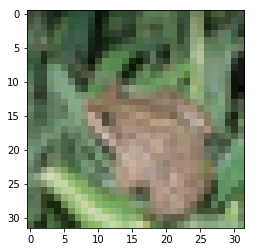

In [14]:
plt.imshow(X_test[4])

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
# normalise pixel values for both the training and the testing data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
#The final labelling is done as such:

# 0 - airplane
# 1 - automobile
# 2 - bird
# 3 - cat
# 4 - deer
# 5 - dog
# 6 - frog
# 7 - horse
# 8 - ship
# 9 - truck

In [9]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [10]:
#output column vectors to indicate what class each image is identified as

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
#Sequential model 

from keras.models import Sequential

#layers
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

#constraint used in regularization of the model as a tradeoff between overfitting and generalization of the model
from keras.constraints import maxnorm

In [12]:
#Sequential model
model = Sequential()

In [13]:
# First 2D convolutional layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3), kernel_constraint=maxnorm(3)))
# 20% Dropout
model.add(Dropout(0.2))
# Second 2D convolutional layer
model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_constraint=maxnorm(3)))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten to join the convolutional layers to the fully connected(Dense) layers
model.add(Flatten())
# First dense layer
model.add(Dense(100, activation='relu', kernel_constraint=maxnorm(3)))
# Dropout
model.add(Dropout(0.4))
# Last output layer
model.add(Dense(10, activation='softmax'))

In [14]:
#we will be using SGD(Stochastic Gradient Descent) as our loss function
#SGD requires a couple of things; namely, learning rate(lrate), decay = lrate/epochs, momentum, and nesterov

from keras.optimizers import SGD

lrate = 0.01
epochs = 25
decay = lrate/epochs

sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 270s 5ms/step - loss: 1.7565 - acc: 0.3579 - val_loss: 1.3838 - val_acc: 0.5066
Epoch 2/25
50000/50000 [==============================] - 265s 5ms/step - loss: 1.3581 - acc: 0.5142 - val_loss: 1.2480 - val_acc: 0.5608
Epoch 3/25
50000/50000 [==============================] - 284s 6ms/step - loss: 1.1896 - acc: 0.5743 - val_loss: 1.0581 - val_acc: 0.6287
Epoch 4/25
50000/50000 [==============================] - 280s 6ms/step - loss: 1.0705 - acc: 0.6213 - val_loss: 1.0102 - val_acc: 0.6430
Epoch 5/25
50000/50000 [==============================] - 262s 5ms/step - loss: 0.9856 - acc: 0.6531 - val_loss: 0.9639 - val_acc: 0.6555
Epoch 6/25
50000/50000 [==============================] - 261s 5ms/step - loss: 0.9131 - acc: 0.6736 - val_loss: 0.9297 - val_acc: 0.6753
Epoch 7/25
50000/50000 [==============================] - 259s 5ms/step - loss: 0.8576 - acc: 0.6960 - val_loss: 0.9151 - 

In [23]:
prediction = model.predict(X_test[:5])

In [24]:
prediction

array([[7.17210677e-03, 3.65750529e-05, 4.78597125e-03, 5.51711023e-01,
        4.05700225e-03, 2.63747722e-01, 4.26780991e-02, 1.12417300e-04,
        1.25215739e-01, 4.83341981e-04],
       [1.02206657e-03, 8.97699744e-02, 4.42709688e-11, 6.37836612e-14,
        6.14211969e-13, 2.01901156e-16, 7.00967604e-14, 3.73704634e-14,
        9.09207523e-01, 4.14448095e-07],
       [3.24114710e-01, 7.77701288e-03, 1.17693075e-04, 6.44307556e-06,
        1.36760582e-05, 3.23117000e-08, 2.78635124e-08, 9.61713909e-07,
        6.64609671e-01, 3.35981511e-03],
       [7.55351007e-01, 2.39002664e-04, 5.56482235e-03, 1.84006130e-05,
        2.69889046e-04, 8.11907874e-09, 1.38342864e-06, 3.87131287e-08,
        2.38551021e-01, 4.41969041e-06],
       [6.59710064e-11, 1.14100132e-10, 1.63930934e-03, 2.57364800e-03,
        9.28901672e-01, 6.28373382e-05, 6.68225810e-02, 2.20107719e-08,
        3.66900399e-11, 4.02296980e-11]], dtype=float32)

In [25]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)